
# 🎬 Movie Rating Prediction

This notebook aims to build a **predictive model** to estimate movie ratings using various features.



### Handling Missing Values
This part deals with detecting and filling missing values.

In [2]:
import pandas as pd

# Load your dataset with a different encoding
df = pd.read_csv("/content/movies.csv", encoding='ISO-8859-1')

# Show number of rows before cleaning
initial_count = df.shape[0]
print(f"Initial number of rows: {initial_count}")

# Drop rows where the 'Rating' column is blank or NaN
df_cleaned = df.dropna(subset=['Rating'])

# Show number of rows after cleaning
final_count = df_cleaned.shape[0]
print(f"Number of rows after removing blank 'Rating': {final_count}")

# Optionally, save the cleaned data to a new file
df_cleaned.to_csv("/content/movies_cleaned.csv", index=False)



Initial number of rows: 15509
Number of rows after removing blank 'Rating': 7919


### 🧩 Code Explanation
This code cell performs part of the pipeline—please refer to inline comments.

In [3]:
df_cleaned.head(
)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [4]:
# Check for missing values (NaN or blank) in all columns
missing_values = df.isna().sum()  # Count NaN values

# Check for blank values (empty strings) and count them in each column
blank_values = (df == '').sum()  # Count blank strings

# Combine both counts into a single DataFrame for easier inspection
missing_data = pd.DataFrame({
    'NaN Count': missing_values,
    'Blank Count': blank_values
})

# Filter out columns with no missing or blank values for cleaner output
missing_data = missing_data[missing_data['NaN Count'] > 0]
missing_data = missing_data[missing_data['Blank Count'] > 0]

# Display the missing data count
print("Missing values in each column (NaN and blank counts):")
print(missing_data)

# Optionally, if you want to see the total count of missing data across the entire dataset:
total_missing = missing_data.sum(axis=1).sum()
print(f"\nTotal missing values in dataset: {total_missing}")


Missing values in each column (NaN and blank counts):
Empty DataFrame
Columns: [NaN Count, Blank Count]
Index: []

Total missing values in dataset: 0


In [5]:
# Now, let's handle any other missing values in the dataset
# Check for missing values in all columns
missing_values = df_cleaned.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Drop rows where any other column has missing values
df_cleaned = df_cleaned.dropna()

# Check the number of rows after further cleaning
final_cleaned_count = df_cleaned.shape[0]
print(f"Number of rows after removing rows with missing values: {final_cleaned_count}")

# Optionally, let's handle categorical columns like 'Genre', 'Director', etc. with one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Genre', 'Director', 'Actor 1', 'Actor 2'], drop_first=True)

# Ensure all columns are numeric for the model
print("Data types after one-hot encoding:")
print(df_encoded.dtypes)

# Prepare features (X) and target variable (y)
X = df_encoded.drop(columns=['Rating'])  # Features (excluding the target column 'Rating')
y = df_encoded['Rating']  # Target variable (Rating)



Missing values per column:
Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64
Number of rows after removing rows with missing values: 5659
Data types after one-hot encoding:
Name                      object
Year                      object
Duration                  object
Rating                   float64
Votes                     object
                          ...   
Actor 2_Zoa Morani          bool
Actor 2_Zoya Afroz          bool
Actor 2_Zoya Hussain        bool
Actor 2_Zubeida             bool
Actor 2_Zuber K. Khan       bool
Length: 7090, dtype: object


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Simulating the dataframe structure based on provided information
data = {
    'Name': ['Movie1', 'Movie2', 'Movie3'],
    'Year': ['2021', '2022', '2023'],
    'Duration': ['120', '130', '140'],
    'Votes': ['1000', '1500', '1200'],
    'Rating': [7.5, 8.0, 8.5],
    'Genre': ['Action', 'Drama', 'Comedy'],
    'Director': ['DirectorA', 'DirectorB', 'DirectorC'],
    'Actor 1': ['ActorX', 'ActorY', 'ActorZ'],
    'Actor 2': ['ActorM', 'ActorN', 'Saanvi Dhiman']
}

df = pd.DataFrame(data)

# Data Preprocessing
def preprocess_data(df):
    # Drop rows with missing 'Rating'
    df = df.dropna(subset=['Rating'])

    # Drop rows with any other missing values
    df = df.dropna()

    # Clean and convert 'Year', 'Duration', and 'Votes' columns
    df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)
    df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(int)
    df['Votes'] = df['Votes'].str.extract(r'(\d+)').astype(int)

    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2'], drop_first=True)

    # Ensure 'Rating' is numeric
    df_encoded['Rating'] = pd.to_numeric(df_encoded['Rating'], errors='coerce')

    # Drop rows where 'Rating' could not be converted to numeric
    df_encoded = df_encoded.dropna(subset=['Rating'])

    # Drop the 'Name' column as it is not useful for prediction
    df_encoded = df_encoded.drop(columns=['Name'])

    # Print columns and their data types for debugging
    print("Columns and data types after preprocessing:")
    return df_encoded.dtypes

preprocess_data(df)

Columns and data types after preprocessing:


,0
Year,int64
Duration,int64
Votes,int64
Rating,float64
Genre_Comedy,bool
Genre_Drama,bool
Director_DirectorB,bool
Director_DirectorC,bool
Actor 1_ActorY,bool
Actor 1_ActorZ,bool


### Random Forest Regressor


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ========== STEP 1: Preprocessing ==========

def preprocess_data(df):
    df = df.dropna(subset=['Rating']).dropna()

    # Clean and convert Year, Duration, Votes
    df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(int)
    df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)').astype(int)
    df['Votes'] = df['Votes'].astype(str).str.replace(',', '').str.extract(r'(\d+)').astype(float)
    df['Votes'] = np.log1p(df['Votes'])  # log-transform votes

    # Handle multi-genre
    df['Genre'] = df['Genre'].astype(str).str.split(',\s*')
    unique_genres = set(genre for genres in df['Genre'] for genre in genres)
    for genre in unique_genres:
        df[f'Genre_{genre}'] = df['Genre'].apply(lambda g: int(genre in g))
    df = df.drop(columns=['Genre'])

    # Drop unused columns
    df = df.drop(columns=['Name', 'Actor 3'])

    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=['Director', 'Actor 1', 'Actor 2'], drop_first=True)

    # Feature Engineering: Director_Success_Rate
    director_cols = [col for col in df.columns if col.startswith('Director_')]
    df['Director_Success_Rate'] = np.nan
    for col in director_cols:
        avg_rating = df.loc[df[col] == 1, 'Rating'].mean()
        df.loc[df[col] == 1, 'Director_Success_Rate'] = avg_rating

    # Feature Engineering: Genre_Avg_Rating
    genre_cols = [col for col in df.columns if col.startswith('Genre_')]
    df['Genre_Avg_Rating'] = np.nan
    for col in genre_cols:
        avg_rating = df.loc[df[col] == 1, 'Rating'].mean()
        df.loc[df[col] == 1, 'Genre_Avg_Rating'] = avg_rating

    df = df.dropna(subset=['Rating', 'Director_Success_Rate', 'Genre_Avg_Rating'])

    return df

# Load dataset
file_path = '/content/movies.csv'  # Update path if needed
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df_encoded = preprocess_data(df)

# ========== STEP 2: Train Model ==========

def train_model(df):
    X = df.drop(columns=['Rating'])
    y = df['Rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5,
                                min_samples_leaf=2, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
    print(f"R2: {r2_score(y_test, y_pred):.3f}")

    return rf, X.columns

model, features = train_model(df_encoded)


MAE: 0.518
MSE: 0.582
RMSE: 0.763
R2: 0.694


In [8]:
def predict_rating(model, features, input_data_raw, df_template):
    input_data = {}

    # Basic numeric features
    input_data['Year'] = input_data_raw.get('Year', 0)
    input_data['Duration'] = input_data_raw.get('Duration', 0)
    input_data['Votes'] = np.log1p(input_data_raw.get('Votes', 0))  # log-transform like training

    # Genre handling
    for col in features:
        if col.startswith('Genre_'):
            genre = col.replace('Genre_', '')
            input_data[col] = int(genre in input_data_raw.get('Genre', []))

    # Director one-hot encoding
    for col in features:
        if col.startswith('Director_'):
            name = col.replace('Director_', '')
            input_data[col] = int(input_data_raw.get('Director') == name)

    # Actor 1
    for col in features:
        if col.startswith('Actor 1_'):
            name = col.replace('Actor 1_', '')
            input_data[col] = int(input_data_raw.get('Actor 1') == name)

    # Actor 2
    for col in features:
        if col.startswith('Actor 2_'):
            name = col.replace('Actor 2_', '')
            input_data[col] = int(input_data_raw.get('Actor 2') == name)

    # Handle Director_Success_Rate
    dir_col = f'Director_{input_data_raw.get("Director")}'
    if dir_col in df_template.columns:
        avg = df_template[df_template[dir_col] == 1]['Rating'].mean()
        input_data['Director_Success_Rate'] = avg if not np.isnan(avg) else df_template['Rating'].mean()
    else:
        input_data['Director_Success_Rate'] = df_template['Rating'].mean()

    # Handle Genre_Avg_Rating
    genre_cols = [col for col in features if col.startswith('Genre_')]
    genre_ratings = []
    for col in genre_cols:
        if input_data.get(col) == 1:
            avg = df_template[df_template[col] == 1]['Rating'].mean()
            if not np.isnan(avg):
                genre_ratings.append(avg)
    input_data['Genre_Avg_Rating'] = np.mean(genre_ratings) if genre_ratings else df_template['Rating'].mean()

    # Fill any missing features with 0
    for feature in features:
        if feature not in input_data:
            input_data[feature] = 0

    input_df = pd.DataFrame([input_data], columns=features)
    prediction = model.predict(input_df)[0]

    print("Predicted Rating:", prediction)
    return prediction


In [9]:
# Example usage:
input_movie = {
    'Year': 2023,
    'Duration': 120,
    'Votes': 10000,
    'Genre': ['Action', 'Adventure'],
    'Director': 'Christopher Nolan',
    'Actor 1': 'Leonardo DiCaprio',
    'Actor 2': 'Tom Hardy'
}

predict_rating(model, features, input_movie, df_encoded)


Predicted Rating: 6.168734523809524


np.float64(6.168734523809524)

<ipython-input-10-539189f8a49a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


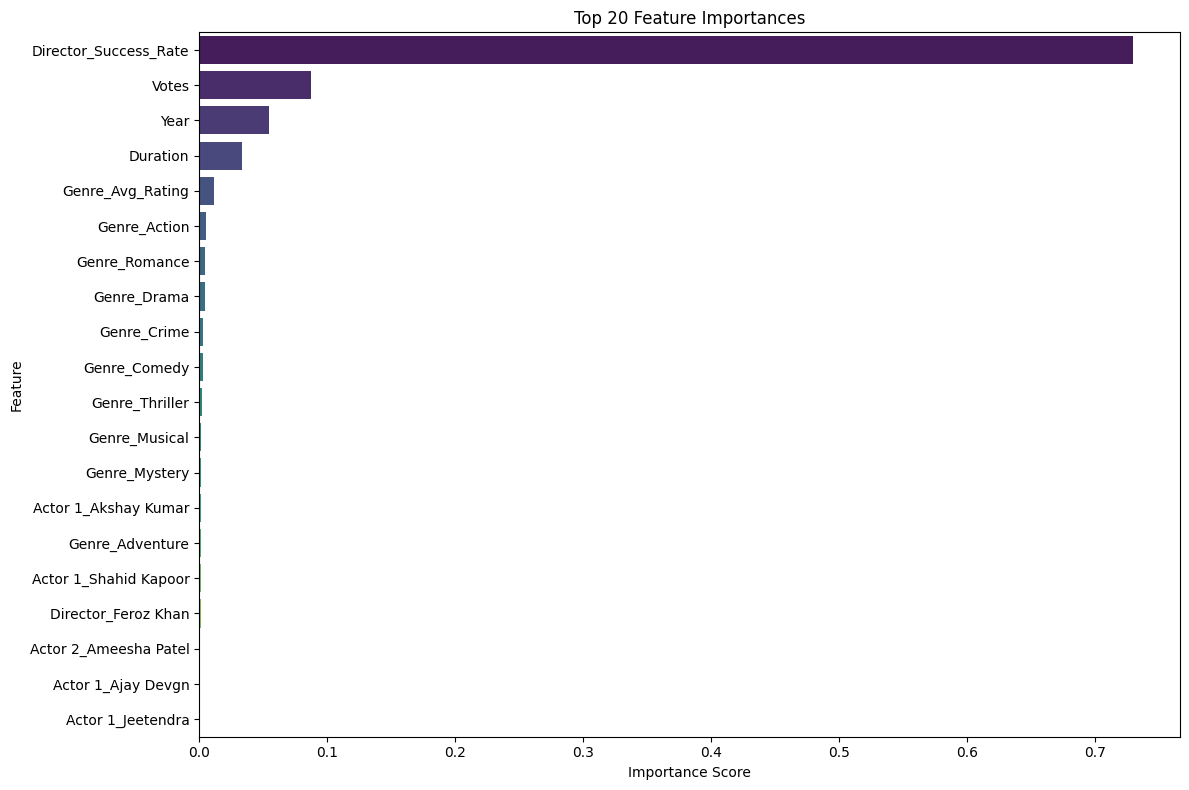

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure model and features are already defined from training
# Example: model, features = train_model(df_encoded)

# Get feature importances from trained model
importances = model.feature_importances_

# Create a DataFrame with features and their importance scores
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort and get top 20
top_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Regression model


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
file_path = '/content/movies.csv'  # Update path if needed
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# ========== STEP 1: Preprocessing ==========

def preprocess_data(df):
    df = df.dropna(subset=['Rating']).dropna()

    # Clean numeric fields
    df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(int)
    df['Duration'] = df['Duration'].astype(str).str.extract(r'(\d+)').astype(int)
    df['Votes'] = df['Votes'].astype(str).str.replace(',', '').str.extract(r'(\d+)').astype(int)
    df['Votes'] = np.log1p(df['Votes'])  # log transform

    # Genre one-hot encoding
    df['Genre'] = df['Genre'].astype(str).str.split(',\s*')
    unique_genres = set(genre for genres in df['Genre'] for genre in genres)
    for genre in unique_genres:
        df[f'Genre_{genre}'] = df['Genre'].apply(lambda g: int(genre in g))
    df = df.drop(columns=['Genre'])

    # Drop unused columns
    df = df.drop(columns=['Name', 'Actor 3'])

    # One-hot encode actors/director
    df = pd.get_dummies(df, columns=['Director', 'Actor 1', 'Actor 2'], drop_first=True)

    return df

df_encoded = preprocess_data(df)

# ========== STEP 2: Train Linear Regression Model ==========

X = df_encoded.drop(columns=['Rating'])
y = df_encoded['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")


MAE: 1.349
MSE: 4.293
RMSE: 2.072
R2: -1.318


### 🏆 Feature Engineering: Director Success Rate
Creates new features such as director's average movie rating.

In [12]:
# Clean necessary columns
df = df.dropna(subset=['Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

# Function to get ratings by actor or director
def get_ratings_by_person(df, person_name):
    person_name_clean = person_name.strip().lower()

    # Find matching rows
    matched_movies = df[
        (df['Director'].str.lower() == person_name_clean) |
        (df['Actor 1'].str.lower() == person_name_clean) |
        (df['Actor 2'].str.lower() == person_name_clean) |
        (df['Actor 3'].str.lower() == person_name_clean)
    ]

    if matched_movies.empty:
        print(f"No movies found for '{person_name}'.")
        return

    avg_rating = matched_movies['Rating'].mean()

    print(f"\n🎬 Movies featuring or directed by '{person_name}':\n")
    display(matched_movies[['Name', 'Year', 'Rating']])
    print(f"\n⭐ Average Rating: {avg_rating:.2f}")

# 🔍 Example usage:
get_ratings_by_person(df, "Shoojit Sircar")  # Replace with any name



🎬 Movies featuring or directed by 'Shoojit Sircar':



<ipython-input-12-04b502121bc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


,Name,Year,Rating
6,...Yahaan,(2005),7.4
5250,Gulabo Sitabo,(2020),6.3
8530,Madras Cafe,(2013),7.7
10297,October,(2018),7.5
10854,Piku,(2015),7.6
14573,Udham Singh,(2021),8.2
14842,Vicky Donor,(2012),7.8



⭐ Average Rating: 7.50


In [13]:
get_ratings_by_person(df, "tabu")


🎬 Movies featuring or directed by 'tabu':



,Name,Year,Rating
55,2001: Do Hazaar Ek,(1998),3.5
512,Aavida Maa Aavide,(1998),6.4
1019,Andhadhun,(2018),8.2
1335,Astitva,(2000),7.3
2087,Bhagmati,(2005),6.1
2409,Biwi No. 2,(2000),5.7
2849,Chandni Bar,(2001),7.6
2929,Cheeni Kum,(2007),6.8
3231,Coolie No. 1,(1991),6.7
3459,Darmiyaan: In Between,(1997),7.2



⭐ Average Rating: 5.63


In [14]:
import pandas as pd

# Load your dataset (update path if needed)
file_path = '/content/movies.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Show data structure
df.head()


# Clean and prepare data
df = df.dropna(subset=['Rating', 'Director', 'Genre', 'Actor 1', 'Actor 2', 'Actor 3'])
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

# -------------------------------------
# 🎬 Genre Average Rating Feature
# -------------------------------------
df['Genre_List'] = df['Genre'].apply(lambda x: [g.strip() for g in x.split(',')])
df_exploded_genre = df.explode('Genre_List')

# Compute average rating per genre
genre_avg_dict = df_exploded_genre.groupby('Genre_List')['Rating'].mean().to_dict()

# Assign average of all genres to each movie
df['Genre_Avg_Rating'] = df['Genre_List'].apply(
    lambda genres: sum([genre_avg_dict.get(g, 0) for g in genres]) / len(genres)
)

# -------------------------------------
# 🎥 Director Success Rate
# -------------------------------------
director_avg = df.groupby('Director')['Rating'].mean().to_dict()
df['Director_Success_Rate'] = df['Director'].map(director_avg)

# -------------------------------------
# 🌟 Actor Success Rate (Average of Actor 1–3)
# -------------------------------------
actor_ratings = pd.concat([
    df[['Actor 1', 'Rating']].rename(columns={'Actor 1': 'Actor'}),
    df[['Actor 2', 'Rating']].rename(columns={'Actor 2': 'Actor'}),
    df[['Actor 3', 'Rating']].rename(columns={'Actor 3': 'Actor'})
])

actor_avg_dict = actor_ratings.groupby('Actor')['Rating'].mean().to_dict()

df['Actor_1_Success'] = df['Actor 1'].map(actor_avg_dict)
df['Actor_2_Success'] = df['Actor 2'].map(actor_avg_dict)
df['Actor_3_Success'] = df['Actor 3'].map(actor_avg_dict)

# Combine into a single actor success score
df['Actors_Avg_Success'] = df[['Actor_1_Success', 'Actor_2_Success', 'Actor_3_Success']].mean(axis=1)

# Drop helper column
df.drop(columns=['Genre_List'], inplace=True)

# ✅ Preview
df[['Name', 'Rating', 'Genre_Avg_Rating', 'Director_Success_Rate', 'Actors_Avg_Success']].head()


,Name,Rating,Genre_Avg_Rating,Director_Success_Rate,Actors_Avg_Success
1,#Gadhvi (He thought he was Gandhi),7.0,5.988834,7.000000,6.855556
3,#Yaaram,4.4,5.737731,4.400000,4.838889
5,...Aur Pyaar Ho Gaya,4.7,5.959252,5.358824,5.751284
6,...Yahaan,7.4,5.905988,7.500000,5.875279
8,?: A Question Mark,5.6,5.362785,5.600000,5.662121


### Feature Engineering: Director and Actor Success Rate
Creates new features such as director's and actor's average movie rating.


In [15]:
# Helper: Get average rating by director
def get_director_rating(director_name):
    if director_name in director_avg:
        return director_avg[director_name]
    else:
        return "Not available"

# Helper: Get average rating by actor (aggregated across all roles)
def get_actor_rating(actor_name):
    if actor_name in actor_avg_dict:
        return actor_avg_dict[actor_name]
    else:
        return "Not available"

# Take input from user
user_choice = input("Do you want to search by 'director' or 'actor'? ").strip().lower()

if user_choice == "director":
    dname = input("Enter director name: ").strip()
    result = get_director_rating(dname)
    print(f"Average rating for movies directed by '{dname}': {result}")

elif user_choice == "actor":
    aname = input("Enter actor name: ").strip()
    result = get_actor_rating(aname)
    print(f"Average rating for movies with actor '{aname}': {result}")

else:
    print("Invalid input. Please type either 'director' or 'actor'.")


Do you want to search by 'director' or 'actor'? actor
Enter actor name: Tabu
Average rating for movies with actor 'Tabu': 5.63265306122449


In [16]:
import pandas as pd

# If your genre column contains multiple genres separated by commas (e.g., "Action,Comedy")
# We'll first need to explode them so we can calculate per-genre averages.

# Step 1: Create a copy of the dataframe and explode the genres
df_genre = df.copy()
df_genre['Genre'] = df_genre['Genre'].fillna("Unknown")  # handle missing
df_genre['Genre'] = df_genre['Genre'].apply(lambda x: x.split(','))  # split multi-genres
df_exploded = df_genre.explode('Genre')

# Step 2: Compute average rating per genre
genre_avg_rating = df_exploded.groupby('Genre')['Rating'].mean().to_dict()

# Step 3: Apply average rating back to original dataframe
# For multi-genre movies, we'll take the average of the genre averages
def compute_avg_genre_rating(genres):
    if isinstance(genres, str):
        genre_list = genres.split(',')
    else:
        genre_list = []
    ratings = [genre_avg_rating.get(g.strip(), 0) for g in genre_list]
    return sum(ratings) / len(ratings) if ratings else 0

df['Avg_Genre_Rating'] = df['Genre'].apply(compute_avg_genre_rating)


### Feature Engineering:Genre avg score
Creates new features such as Genre average rating.

In [18]:
import pandas as pd

# Example DataFrame setup (if not already defined)
# df = pd.read_csv("your_movie_dataset.csv")

# Handle missing genres
df['Genre'] = df['Genre'].fillna("Unknown")

# Explode genres for accurate averaging
df_genre = df.copy()
df_genre['Genre'] = df_genre['Genre'].apply(lambda x: x.split(','))
df_exploded = df_genre.explode('Genre')

# Compute average rating for each genre
genre_avg_rating = df_exploded.groupby('Genre')['Rating'].mean().to_dict()

# Display average ratings by genre
print("Average Ratings by Genre:")
for genre, rating in genre_avg_rating.items():
    print(f"{genre.strip()}: {round(rating, 2)}")

# Function to compute average rating for user-input genres
def get_user_genre_avg():
    user_input = input("\nEnter one or more genres (comma-separated): ")
    genres = [g.strip() for g in user_input.split(',')]
    ratings = [genre_avg_rating.get(g, None) for g in genres]

    missing = [g for g, r in zip(genres, ratings) if r is None]
    valid_ratings = [r for r in ratings if r is not None]

    if valid_ratings:
        avg = sum(valid_ratings) / len(valid_ratings)
        print(f"\nAverage Genre Rating for {', '.join(genres)}: {round(avg, 2)}")
    else:
        print("No matching genres found.")

    if missing:
        print(f"Genres not found in dataset: {', '.join(missing)}")

# Call the function
get_user_genre_avg()


Average Ratings by Genre:
Action: 5.62
Adventure: 5.64
Biography: 6.85
Comedy: 5.52
Crime: 5.59
Drama: 5.8
Family: 6.19
Fantasy: 5.67
History: 6.83
Horror: 4.98
Music: 5.99
Musical: 6.21
Mystery: 5.79
News: 8.0
Romance: 5.78
Sci-Fi: 5.07
Sport: 6.41
Thriller: 5.58
War: 6.15
Western: 5.25
Action: 5.42
Adventure: 6.09
Animation: 5.96
Biography: 6.68
Comedy: 5.8
Crime: 6.01
Documentary: 7.59
Drama: 6.17
Family: 6.03
Fantasy: 6.25
History: 6.63
Horror: 4.66
Music: 7.25
Musical: 6.01
Mystery: 5.78
Romance: 5.54
Sci-Fi: 6.46
Sport: 5.8
Thriller: 5.28
War: 4.33

Enter one or more genres (comma-separated): Action

Average Genre Rating for Action: 5.42
